In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [4]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [5]:
df.head()
print(df.shape)

(10000, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.duplicated().sum()

0

In [9]:
df['Exited'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64>

In [13]:
# df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
print(df.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
# df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [20]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [21]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [42]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [100]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='relu'))


In [69]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 7)              │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [101]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [102]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7324 - loss: 2.4508 - val_accuracy: 0.7631 - val_loss: 2.1003
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7639 - loss: 2.1673 - val_accuracy: 0.7525 - val_loss: 1.7086
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7483 - loss: 1.7484 - val_accuracy: 0.7631 - val_loss: 1.4176
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7661 - loss: 1.4955 - val_accuracy: 0.7625 - val_loss: 1.2901
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7648 - loss: 1.3348 - val_accuracy: 0.7688 - val_loss: 1.2408
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7700 - loss: 1.2185 - val_accuracy: 0.7800 - val_loss: 1.1458
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7891 - loss: 1.1214 - val_accuracy: 0.7844 - val_loss: 1.0869
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7888 - loss: 1.1578 - val_accu

In [103]:
model.layers[0].get_weights()

[array([[-3.02319117e-02, -1.97423905e-01,  2.35649750e-01,
          6.65523037e-02, -9.16716903e-02, -3.68589848e-01,
         -6.58932514e-03,  3.68310153e-01, -1.21220909e-01,
         -1.56063959e-01, -3.58362049e-01],
        [ 1.71749666e-01, -2.59455681e-01,  2.01830402e-01,
         -3.19416672e-02,  2.30235338e-01,  1.34904057e-01,
          3.85909341e-02, -5.51616609e-01, -2.99324304e-01,
          1.13973416e-01,  2.49722973e-01],
        [ 5.77645116e-02,  5.08542918e-02,  1.11177355e-01,
         -3.44995439e-01,  2.68377326e-02,  4.81503993e-01,
         -1.01851635e-01, -3.22256945e-02,  4.91899043e-01,
          1.38947219e-01,  1.95156988e-02],
        [ 1.92723274e-01, -3.20780098e-01, -1.36072308e-01,
          3.27166207e-02, -3.43702197e-01, -4.15205032e-01,
          1.07768096e-01, -1.58198580e-01, -6.83970332e-01,
         -3.82940620e-01, -4.94496316e-01],
        [ 6.46153808e-01, -1.17640994e-01, -7.41754651e-01,
          4.72536772e-01, -1.00660992e+00, -

In [104]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [105]:
y_pred = np.where(y_log > 0.5,1,0)

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8485

In [107]:
import matplotlib.pyplot as plt


In [108]:
history.history

{'accuracy': [0.7432812452316284,
  0.7628124952316284,
  0.75390625,
  0.7670312523841858,
  0.7685937285423279,
  0.7723437547683716,
  0.7904687523841858,
  0.7799999713897705,
  0.7723437547683716,
  0.7667187452316284,
  0.7728124856948853,
  0.7835937738418579,
  0.7850000262260437,
  0.7770312428474426,
  0.7889062762260437,
  0.7946875095367432,
  0.7965624928474426,
  0.796093761920929,
  0.797656238079071,
  0.80078125,
  0.8017187714576721,
  0.803906261920929,
  0.8064062595367432,
  0.8075000047683716,
  0.8098437786102295,
  0.8106250166893005,
  0.8120312690734863,
  0.815625011920929,
  0.8187500238418579,
  0.8217187523841858,
  0.8243749737739563,
  0.8262500166893005,
  0.8290625214576721,
  0.8284375071525574,
  0.8282812237739563,
  0.8271874785423279,
  0.8287500143051147,
  0.8362500071525574,
  0.8348437547683716,
  0.8357812762260437,
  0.8373437523841858,
  0.835156261920929,
  0.8379687666893005,
  0.8403124809265137,
  0.8401562571525574,
  0.842343747615814

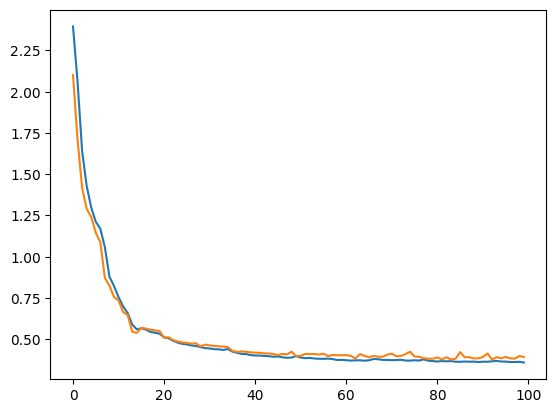

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

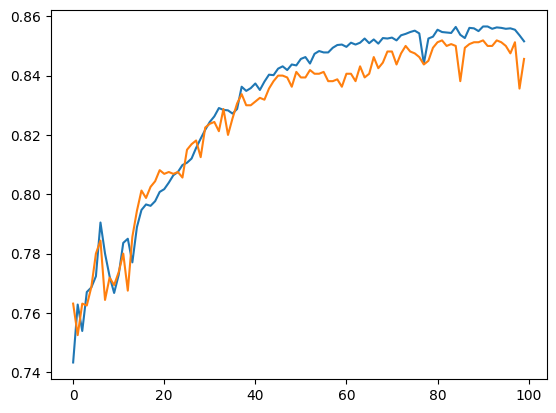

In [110]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])